In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/student personality prediction/student.csv', skiprows=1)
df = df.drop('Rollno', axis=1)


In [ ]:
# Checking shape of the dataset
print("Shape of the dataset: ", df.shape)

# Checking first few rows of the dataset
print("Few records of the dataset: ")
print(df.head())

# Checking data types of the columns
print("Data types of the columns: ")
print(df.dtypes)


Shape of the dataset:  (1370, 46)
Few records of the dataset: 
   1.  I feel Nervous in a group?  2. I am a good Listener  \
0                             4.0                      5.0   
1                             1.0                      1.0   
2                             4.0                      5.0   
3                             3.0                      5.0   
4                             1.0                      5.0   

   3. I  am comfortable around people  \
0                                 2.0   
1                                 5.0   
2                                 1.0   
3                                 3.0   
4                                 4.0   

   4. How do I react to jokes cracked on me ?  5. I cannot take initiation  \
0                                         2.0                          5.0   
1                                         3.0                          2.0   
2                                         1.0                          4.0   
3    

In [ ]:
print("Missing values in the dataset: ")
print(df.isnull().sum())


Missing values in the dataset: 
1.  I feel Nervous in a group?                                                                                                                                                                                           674
2. I am a good Listener                                                                                                                                                                                                  674
3. I  am comfortable around people                                                                                                                                                                                       674
4. How do I react to jokes cracked on me ?                                                                                                                                                                               674
5. I cannot take initiation                                                         

In [ ]:
# Checking summary statistics for numerical columns
print("Summary Statistics: ")
print(df.describe())

# Checking frequencies for categorical columns
for column in df.select_dtypes(include=['object']).columns:
    print("\nFrequency analysis of column: ", column)
    print(df[column].value_counts())


Summary Statistics: 
       1.  I feel Nervous in a group?  2. I am a good Listener  \
count                      696.000000               696.000000   
mean                         3.206897                 4.053161   
std                          1.240913                 1.047802   
min                          1.000000                 1.000000   
25%                          2.000000                 3.000000   
50%                          3.000000                 4.000000   
75%                          4.000000                 5.000000   
max                          5.000000                 5.000000   

       3. I  am comfortable around people  \
count                          696.000000   
mean                             3.543103   
std                              1.257328   
min                              1.000000   
25%                              3.000000   
50%                              4.000000   
75%                              5.000000   
max                     

In [ ]:
df = df.dropna()
print(df.isnull().sum())


1.  I feel Nervous in a group?                                                                                                                                                                                           0
2. I am a good Listener                                                                                                                                                                                                  0
3. I  am comfortable around people                                                                                                                                                                                       0
4. How do I react to jokes cracked on me ?                                                                                                                                                                               0
5. I cannot take initiation                                                                                                 

In [ ]:
# Pairplot for checking relationship between variables
sns.pairplot(df)

# Heatmap for correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install sklearn pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=78e8a699a88e4cf577c203eaf5b0c076d7ee4b3dfa29f7bbe3310927e140a2e7
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('/content/drive/MyDrive/student personality prediction/student.csv', skiprows=1)

# Drop rows with missing values
df = df.dropna()

# Label encoding for categorical columns
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])
X = df.drop('Rollno', axis=1)
# Separating features and target variable
X = X.drop('Class_Lable', axis=1)

y = df['Class_Lable']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest Accuracy: 93.57%
Confusion Matrix:
[[  2   7   0]
 [  0 128   0]
 [  2   0   1]]



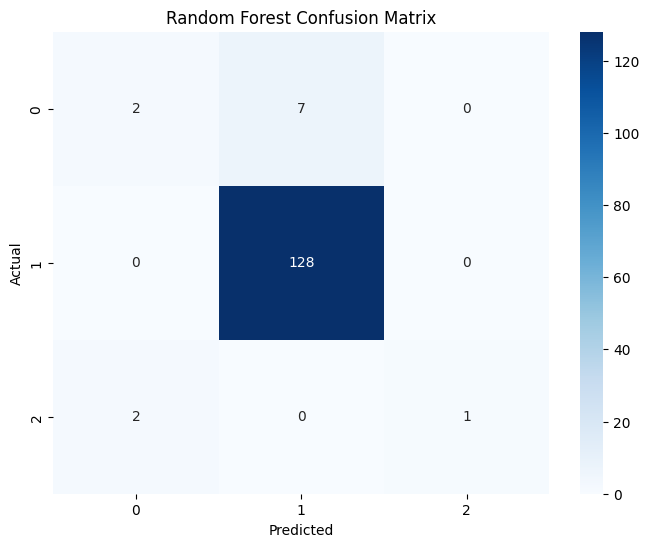

Gradient Boosting Accuracy: 92.86%
Confusion Matrix:
[[  1   7   1]
 [  0 128   0]
 [  2   0   1]]



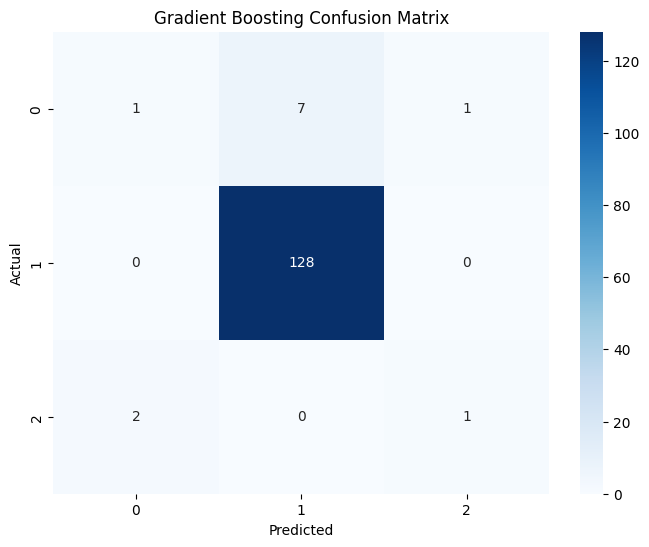

Logistic Regression Accuracy: 93.57%
Confusion Matrix:
[[  4   3   2]
 [  2 126   0]
 [  2   0   1]]



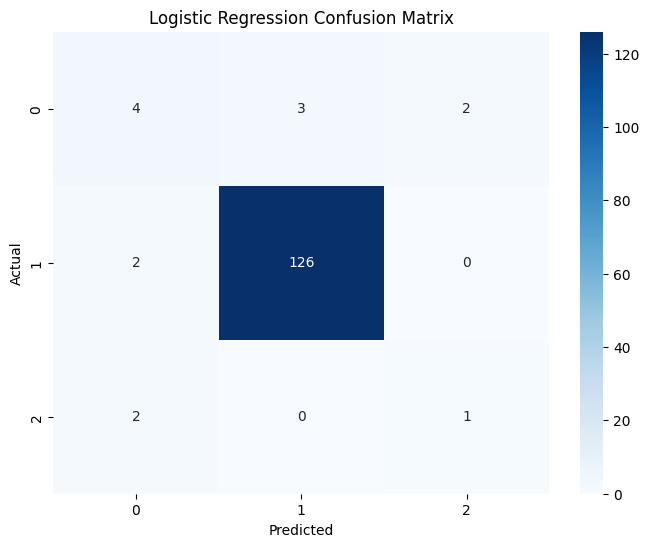

Support Vector Machine Accuracy: 92.86%
Confusion Matrix:
[[  2   7   0]
 [  0 128   0]
 [  2   1   0]]



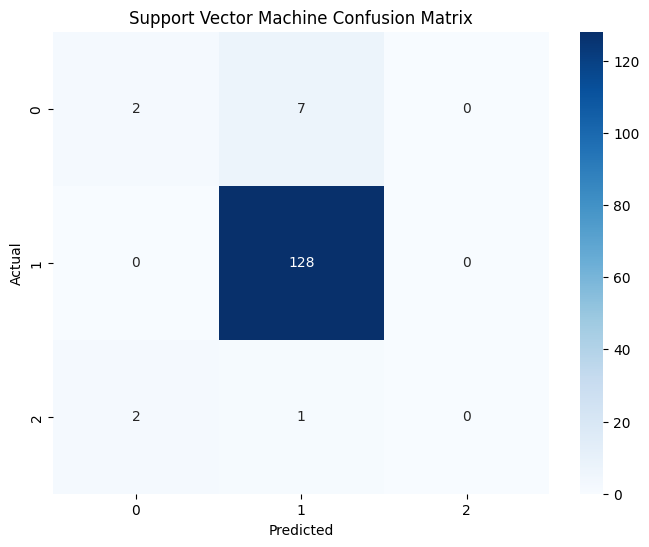

Gaussian Naive Bayes Accuracy: 86.43%
Confusion Matrix:
[[  6   1   2]
 [ 14 114   0]
 [  2   0   1]]



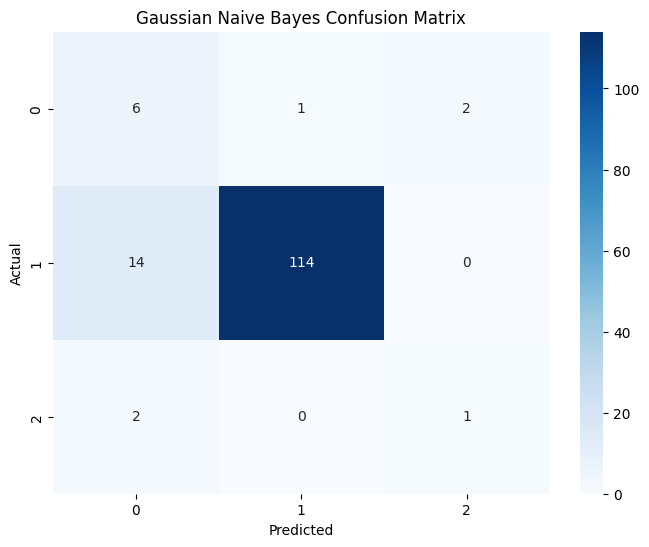

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the ensemble model
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Support Vector Machine': SVC(),
    'Gaussian Naive Bayes': GaussianNB()
}

# Train, predict and evaluate each model
for name, clf in classifiers.items():
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy*100:.2f}%")
    print(f"Confusion Matrix:\n{cm}\n")

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



In [ ]:
import joblib

# Save the model (let's use Random Forest as an example)
joblib.dump(classifiers['Random Forest'], '/content/drive/MyDrive/student personality prediction/random_forest.pkl')


['/content/drive/MyDrive/student personality prediction/random_forest.pkl']

In [ ]:
def predict(input_data):
    # Load the model
    model = joblib.load('/content/drive/MyDrive/student personality prediction/random_forest.pkl')

    # Predict the output
    prediction = model.predict(input_data)

    return prediction

# Example use:
# input_data should be a 2D array, each sublist corresponds to the features of an instance
# input_data = [[...], [...], ...]
# prediction = predict(input_data)


#application1

In [1]:
!pip install streamlit -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 43.0 MB/s eta 0:00:00


In [2]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder  # import statement added here
st.header('SELECT YOUR ROLL NO.')
start_num = 1201
end_num = 1250
prefix = '20241A'

Pujitha = [f"{prefix}{i:04d}" for i in range(start_num, end_num + 1)]
start_num = 1251
end_num = 1299
prefix = '20241A'

Vyshnavi = [f"{prefix}{i:04d}" for i in range(start_num, end_num + 1)]
prefix = '20241A12'
alphabets = [chr(i) for i in range(ord('A'), ord('J'))]  # 'A' to 'I'
numbers = [str(i) for i in range(0, 10)]  # '0' to '9'

Preethi = []

for alpha in alphabets:
    for num in numbers:
        Preethi.append(f"{prefix}{alpha}{num}")
    if alpha != 'I':
        Preethi.append(f"{prefix}{alpha}0")

Preethi.append(f"{prefix}I0")
prefix = '20241A05'
alphabets = [chr(i) for i in range(ord('A'), ord('J'))]  # 'A' to 'I'
numbers = [str(i) for i in range(0, 10)]  # '0' to '9'

PQR = []

for alpha in alphabets:
    for num in numbers:
        PQR.append(f"{prefix}{alpha}{num}")
    if alpha != 'I':
        PQR.append(f"{prefix}{alpha}0")

PQR.append(f"{prefix}I0")
prefix = '20241A05'
alphabets = [chr(i) for i in range(ord('I'), ord('N'))]  # 'I' to 'M'
numbers = [str(i) for i in range(1, 10)]  # '1' to '9'

KLM = []

for alpha in alphabets:
    if alpha == 'I':  # Start from '1' for 'I'
        numbers = [str(i) for i in range(1, 10)]
    else:  # Start from '0' for other alphabets
        numbers = [str(i) for i in range(0, 10)]
    for num in numbers:
        KLM.append(f"{prefix}{alpha}{num}")
    if alpha != 'M':
        KLM.append(f"{prefix}{alpha}0")

KLM.append(f"{prefix}M0")
prefix = '20241A04'
alphabets = [chr(i) for i in range(ord('A'), ord('J'))]  # 'A' to 'I'
numbers = [str(i) for i in range(0, 10)]  # '0' to '9'

JEN = []

for alpha in alphabets:
    for num in numbers:
        JEN.append(f"{prefix}{alpha}{num}")
    if alpha != 'I':
        JEN.append(f"{prefix}{alpha}0")

JEN.append(f"{prefix}I0")  # Ensure the last string is '20241A04I0'

start_num = 201
end_num = 250
prefix = '20241A0'

ABC = [f"{prefix}{i:03d}" for i in range(start_num, end_num + 1)]
start_num = 501
end_num = 550
prefix = '20241A0'

XYZ = [f"{prefix}{i:03d}" for i in range(start_num, end_num + 1)]
start_num = 551
end_num = 599
prefix = '20241A0'

HIJ = [f"{prefix}{i:03d}" for i in range(start_num, end_num + 1)]
start_num = 401
end_num = 450
prefix = '20241A0'

DEF = [f"{prefix}{i:03d}" for i in range(start_num, end_num + 1)]
start_num = 3201
end_num = 3250
prefix = '20241A'

VUK = [f"{prefix}{i:04d}" for i in range(start_num, end_num + 1)]
start_num = 6601
end_num = 6651
prefix = '20241A'

HIG = [f"{prefix}{i:04d}" for i in range(start_num, end_num + 1)]
start_num = 6701
end_num = 6751
prefix = '20241A'

MPS = [f"{prefix}{i:04d}" for i in range(start_num, end_num + 1)]
start_num = 451
end_num = 499
prefix = '20241A0'

JOHN = [f"{prefix}{i:03d}" for i in range(start_num, end_num + 1)]
all_lists = [Pujitha, Vyshnavi, Preethi, ABC, XYZ, HIJ, PQR, KLM, DEF, VUK, HIG, MPS, JOHN, JEN]

# Create an empty list to store the unique elements
unique_elements = []

# Loop through each list in the all_lists
for each_list in all_lists:
    # Loop through each element in each list
    for element in each_list:
        # If the element is not already in the unique_elements list, add it
        if element not in unique_elements:
            unique_elements.append(element)
# create a dictionary with list names and their elements
dict_lists = {"Pujitha": Pujitha, "Vyshnavi": Vyshnavi, "Preethi": Preethi, "ABC": ABC, "XYZ": XYZ, "HIJ": HIJ, "PQR": PQR, "KLM": KLM, "DEF": DEF, "VUK": VUK, "HIG": HIG, "MPS": MPS, "JOHN": JOHN, "JEN": JEN}

# Create the selectbox
selected_element = st.selectbox('Select an element', unique_elements)


# Load trained model
model = joblib.load('/content/drive/MyDrive/student personality prediction/random_forest.pkl')

# Load the data to get column names and unique values
df = pd.read_csv('/content/drive/MyDrive/student personality prediction/student.csv', skiprows=1)
df = df.dropna()
df = df.drop('Class_Lable', axis=1)
df = df.drop('Rollno', axis=1)
# Function to encode input data
def encode_data(input_data):
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == type(object):
            input_data[column] = le.fit_transform(input_data[column])
    return input_data

# Create a dictionary to store user input
user_input = {}

st.title("Student Personality Prediction")

# Create a select box for each feature
for column in df.columns:
    unique_values = pd.unique(df[column])
    user_input[column] = st.selectbox(f'Select value for {column}', options=unique_values)
send_l=pd.DataFrame(user_input, index=[0])
send_d = np.array(send_l).reshape(1, -1)
# Encode the data and reshape for prediction
input_data = encode_data(pd.DataFrame(user_input, index=[0]))
input_data = np.array(input_data).reshape(1, -1)
st.write(send_l)
prediction = model.predict(input_data)
send_d=np.insert(send_d,0,selected_element)
send_d=np.append(send_d,prediction[0])
st.write(send_d)
if st.button('Predict'):

    st.write(f"Predicted class label: {prediction[0]}")
if st.button('SUBMIT'):
    for list_name, list_elements in dict_lists.items():
      if selected_element in list_elements:
          # Create a numpy array  # Replace this with your actual numpy array
          # Convert numpy array to pandas DataFrame
          df = pd.DataFrame(send_d.reshape(-1, len(send_d)))

          # Append DataFrame to CSV file
          filename = "/content/drive/MyDrive/student personality prediction/"+f"{list_name}.csv"
          df.to_csv(filename, mode='a', header=False, index=False)
          st.error(f"Data submitted to: {list_name}")


Writing app.py


In [3]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 3.002s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [4]:
!curl https://ipv4.icanhazip.com/

34.87.177.6


In [ ]:
!curl https://ipv4.icanhazip.com/
!streamlit run /content/app.py &>/content/logs.txt &
!npx localtunnel --port 8501

34.87.177.6
npx: installed 22 in 2.303s
your url is: https://ripe-maps-jam.loca.lt


#WEBAPP CREATION

In [ ]:
import csv
import pandas as pd

# Read the first row from the 'student.csv' file
df = pd.read_csv('/content/drive/MyDrive/student personality prediction/student.csv', skiprows=1)
first_row = df.iloc[0]

# List of names
names = ["Pujitha", "Vyshnavi", "Preethi", "ABC", "XYZ", "HIJ", "PQR", "KLM", "DEF", "VUK", "HIG", "MPS", "JOHN", "JEN"]

for name in names:
    filename = "/content/drive/MyDrive/student personality prediction/"+name + ".csv"
    with open(filename, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)

        # Write the first row from 'student.csv' to the current CSV file
        writer.writerow(df.columns)


        # Write the name to the current CSV file


    print(f"CSV file '{filename}' created successfully.")



CSV file '/content/drive/MyDrive/student personality prediction/Pujitha.csv' created successfully.
CSV file '/content/drive/MyDrive/student personality prediction/Vyshnavi.csv' created successfully.
CSV file '/content/drive/MyDrive/student personality prediction/Preethi.csv' created successfully.
CSV file '/content/drive/MyDrive/student personality prediction/ABC.csv' created successfully.
CSV file '/content/drive/MyDrive/student personality prediction/XYZ.csv' created successfully.
CSV file '/content/drive/MyDrive/student personality prediction/HIJ.csv' created successfully.
CSV file '/content/drive/MyDrive/student personality prediction/PQR.csv' created successfully.
CSV file '/content/drive/MyDrive/student personality prediction/KLM.csv' created successfully.
CSV file '/content/drive/MyDrive/student personality prediction/DEF.csv' created successfully.
CSV file '/content/drive/MyDrive/student personality prediction/VUK.csv' created successfully.
CSV file '/content/drive/MyDrive/stud

In [ ]:
start_num = 1201
end_num = 1250
prefix = '20241A'

Pujitha = [f"{prefix}{i:04d}" for i in range(start_num, end_num + 1)]
start_num = 1251
end_num = 1299
prefix = '20241A'

Vyshnavi = [f"{prefix}{i:04d}" for i in range(start_num, end_num + 1)]
prefix = '20241A12'
alphabets = [chr(i) for i in range(ord('A'), ord('J'))]  # 'A' to 'I'
numbers = [str(i) for i in range(0, 10)]  # '0' to '9'

Preethi = []

for alpha in alphabets:
    for num in numbers:
        Preethi.append(f"{prefix}{alpha}{num}")
    if alpha != 'I':
        Preethi.append(f"{prefix}{alpha}0")

Preethi.append(f"{prefix}I0")
prefix = '20241A05'
alphabets = [chr(i) for i in range(ord('A'), ord('J'))]  # 'A' to 'I'
numbers = [str(i) for i in range(0, 10)]  # '0' to '9'

PQR = []

for alpha in alphabets:
    for num in numbers:
        PQR.append(f"{prefix}{alpha}{num}")
    if alpha != 'I':
        PQR.append(f"{prefix}{alpha}0")

PQR.append(f"{prefix}I0")
prefix = '20241A05'
alphabets = [chr(i) for i in range(ord('I'), ord('N'))]  # 'I' to 'M'
numbers = [str(i) for i in range(1, 10)]  # '1' to '9'

KLM = []

for alpha in alphabets:
    if alpha == 'I':  # Start from '1' for 'I'
        numbers = [str(i) for i in range(1, 10)]
    else:  # Start from '0' for other alphabets
        numbers = [str(i) for i in range(0, 10)]
    for num in numbers:
        KLM.append(f"{prefix}{alpha}{num}")
    if alpha != 'M':
        KLM.append(f"{prefix}{alpha}0")

KLM.append(f"{prefix}M0")
prefix = '20241A04'
alphabets = [chr(i) for i in range(ord('A'), ord('J'))]  # 'A' to 'I'
numbers = [str(i) for i in range(0, 10)]  # '0' to '9'

JEN = []

for alpha in alphabets:
    for num in numbers:
        JEN.append(f"{prefix}{alpha}{num}")
    if alpha != 'I':
        JEN.append(f"{prefix}{alpha}0")

JEN.append(f"{prefix}I0")  # Ensure the last string is '20241A04I0'

start_num = 201
end_num = 250
prefix = '20241A0'

ABC = [f"{prefix}{i:03d}" for i in range(start_num, end_num + 1)]
start_num = 501
end_num = 550
prefix = '20241A0'

XYZ = [f"{prefix}{i:03d}" for i in range(start_num, end_num + 1)]
start_num = 551
end_num = 599
prefix = '20241A0'

HIJ = [f"{prefix}{i:03d}" for i in range(start_num, end_num + 1)]
start_num = 401
end_num = 450
prefix = '20241A0'

DEF = [f"{prefix}{i:03d}" for i in range(start_num, end_num + 1)]
start_num = 3201
end_num = 3250
prefix = '20241A'

VUK = [f"{prefix}{i:04d}" for i in range(start_num, end_num + 1)]
start_num = 6601
end_num = 6651
prefix = '20241A'

HIG = [f"{prefix}{i:04d}" for i in range(start_num, end_num + 1)]
start_num = 6701
end_num = 6751
prefix = '20241A'

MPS = [f"{prefix}{i:04d}" for i in range(start_num, end_num + 1)]
start_num = 451
end_num = 499
prefix = '20241A0'

JOHN = [f"{prefix}{i:03d}" for i in range(start_num, end_num + 1)]
all_lists = [Pujitha, Vyshnavi, Preethi, ABC, XYZ, HIJ, PQR, KLM, DEF, VUK, HIG, MPS, JOHN, JEN]

# Create an empty list to store the unique elements
unique_elements = []

# Loop through each list in the all_lists
for each_list in all_lists:
    # Loop through each element in each list
    for element in each_list:
        # If the element is not already in the unique_elements list, add it
        if element not in unique_elements:
            unique_elements.append(element)
# create a dictionary with list names and their elements
dict_lists = {"Pujitha": Pujitha, "Vyshnavi": Vyshnavi, "Preethi": Preethi, "ABC": ABC, "XYZ": XYZ, "HIJ": HIJ, "PQR": PQR, "KLM": KLM, "DEF": DEF, "VUK": VUK, "HIG": HIG, "MPS": MPS, "JOHN": JOHN, "JEN": JEN}

# Create the selectbox
selected_element = st.selectbox('Select an element', unique_elements)

# Check which list(s) the selected element belongs to
for list_name, list_elements in dict_lists.items():
    if selected_element in list_elements:
        st.write(f"The selected element belongs to the list: {list_name}")

['20241A1201', '20241A1202', '20241A1203', '20241A1204', '20241A1205', '20241A1206', '20241A1207', '20241A1208', '20241A1209', '20241A1210', '20241A1211', '20241A1212', '20241A1213', '20241A1214', '20241A1215', '20241A1216', '20241A1217', '20241A1218', '20241A1219', '20241A1220', '20241A1221', '20241A1222', '20241A1223', '20241A1224', '20241A1225', '20241A1226', '20241A1227', '20241A1228', '20241A1229', '20241A1230', '20241A1231', '20241A1232', '20241A1233', '20241A1234', '20241A1235', '20241A1236', '20241A1237', '20241A1238', '20241A1239', '20241A1240', '20241A1241', '20241A1242', '20241A1243', '20241A1244', '20241A1245', '20241A1246', '20241A1247', '20241A1248', '20241A1249', '20241A1250', '20241A1251', '20241A1252', '20241A1253', '20241A1254', '20241A1255', '20241A1256', '20241A1257', '20241A1258', '20241A1259', '20241A1260', '20241A1261', '20241A1262', '20241A1263', '20241A1264', '20241A1265', '20241A1266', '20241A1267', '20241A1268', '20241A1269', '20241A1270', '20241A1271', '2024

In [ ]:
%%writefile app2.py
import streamlit as st
import pandas as pd

# Set the title of the application
st.title('Student Personality')

# Defining mentors and their credentials
mentors = {
    'Pujitha': 'pujitha1519@gmail.com',
    'Vyshnavi': 'chitikeshi.vyshnavi2002@gmail.com',
    'Preethi': 'preethigangadhara2002@gmail.com',
    'ABC': 'abc@gmail.com',
    'XYZ': 'xyz@gmail.com',
    'HIJ': 'hij@gmail.com',
    'PQR': 'pqr@gmail.com',
    'KLM': 'klm@gmail.com',
    'DEF': 'def@gmail.com',
    'VUK': 'vuk@gmail.com',
    'HIG': 'hig@gmail.com',
    'MPS': 'mps@gmail.com',
    'JOHN': 'john@gmail.com',
    'JEN': 'jen@gmail.com'
}

# Variable to track if user is logged in
logged_in = False
user_name = ''
user_type = ''

if 'logged_in' not in st.session_state:
    st.session_state['logged_in'] = False
    st.session_state['user_name'] = ''
    st.session_state['user_type'] = ''

if not st.session_state['logged_in']:
    # Create the radio button
    st.session_state['user_type'] = st.sidebar.radio('Login as', ['Student', 'Mentor'])

    if st.session_state['user_type'] == 'Student':
        st.sidebar.subheader('Student Login')
        username = st.sidebar.text_input('Enter your username')
        password = st.sidebar.text_input('Enter your password', type='password')
        if st.sidebar.button('Login'):
            st.session_state['logged_in'] = True
            st.session_state['user_name'] = username
            st.success('Logged in successfully')

    elif st.session_state['user_type'] == 'Mentor':
        st.sidebar.subheader('Mentor Login')
        email = st.sidebar.text_input('Enter your email')
        password = st.sidebar.text_input('Enter your password', type='password')
        if st.sidebar.button('Login'):
            # Check if the credentials match any mentor
            for mentor, mentor_email in mentors.items():
                if email == mentor_email and password == mentor:
                    st.session_state['logged_in'] = True
                    st.session_state['user_name'] = mentor
                    st.success('Logged in successfully')
                    break
            if not st.session_state['logged_in']:
                st.error('Invalid email or password')

elif st.session_state['logged_in']:
    if st.session_state['user_type'] == 'Mentor':
        st.header(f'Mentor: {st.session_state["user_name"]}')
        # Assuming the file exists in the same directory as the script
        df = pd.read_csv("/content/drive/MyDrive/student personality prediction/"+f'{st.session_state["user_name"]}.csv')
        st.dataframe(df)
    elif st.session_state['user_type'] == 'Student':
        st.header(f'Student: {st.session_state["user_name"]}')
        st.write("You're logged in successfully!")
        if st.button("GO TO ASSERMENT"):
            st.error('REDIRECTING YOU TO THE ASSESMENT ALL THE BEST')




Overwriting app2.py


In [ ]:
!curl https://ipv4.icanhazip.com/
!streamlit run /content/app2.py &>/content/logs.txt &
!npx localtunnel --port 8501

35.197.25.64
npx: installed 22 in 4.799s
your url is: https://shaggy-cloths-happen.loca.lt
